In [1]:
from io import StringIO

import os

import anndata
import numpy as np
import scanpy

# outdir = "/home/olga/googledrive/TabulaMicrocebus/data/cross-species"
outdir_gdrive = '/home/olga/googledrive/TabulaMicrocebus/data/human-lung-cell-atlas--from-kyle'
outdir_local = "/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/human-lung-cell-atlas--from-kyle"

outdirs = outdir_local, outdir_gdrive
import pandas as pd

In [8]:
ls -lha $outdir_gdrive

total 32G
drwxrwxr-x 1 olga czb 4.0K Dec 13  2019 ./
drwxrwxr-x 1 olga czb 4.0K Dec  2  2019 ../
-rw-rw-r-- 1 olga czb 6.5G Feb  5 14:51 droplet_normal_lung_blood_P1-3.h5ad
-rw-r--r-- 1 olga czb 6.2G Feb  5 15:02 droplet_normal_lung_blood_P1-3__no_duplicate_barcodes.h5ad
-rw-r--r-- 1 olga czb 8.5G Feb 15 10:39 droplet_normal_lung_blood_P1-3__no_duplicate_barcodes__minimal_obs.h5ad
-rw-r--r-- 1 olga czb 6.5G Feb  5 14:57 droplet_normal_lung_blood_P1-3__with_barcode_counts.h5ad
-rw-rw-r-- 1 olga czb  12M Oct 28  2019 droplet_normal_lung_blood_P1-3_metadata.csv
-rw-rw-r-- 1 olga czb 3.3G Oct 30  2019 droplet_normal_lung_blood_P1-3_ncbi_GCT.csv
-rw-rw-r-- 1 olga czb 1.1G Oct 28  2019 facs_normal_lung_blood_P1-3_gencode_GCT.csv
-rw-rw-r-- 1 olga czb 5.7M Oct 28  2019 facs_normal_lung_blood_P1-3_metadata.csv


In [6]:
ls -lh $outdir_local

total 8.5G
-rw-r--r-- 1 root root 8.5G Jul  2 14:14 droplet_normal_lung_blood_P1-3__no_duplicate_barcodes__minimal_obs.h5ad


# Human from Google Drive

In [9]:
%%time

h5ad = os.path.join(
    outdir_gdrive, "droplet_normal_lung_blood_P1-3__no_duplicate_barcodes.h5ad"
)
human_no_duplicate_barcodes = scanpy.read(h5ad)

CPU times: user 1 s, sys: 14.6 s, total: 15.6 s
Wall time: 2min 17s


# Add `narrow_group`, `broad_group`, `compartment_group`

## Simplify columns down to minimal set

In [10]:
obs_minimal = human_no_duplicate_barcodes.obs.rename(
    columns={
        "cell_barcode": "cell_barcode",
        "cell_ontology_class": "cell_ontology_class",
        "channel": "channel",
        "compartment": None,
        "free_annotation": "free_annotation",
        "location": None,
        "magnetic.selection": None,
        "nGene": "n_genes",
        "nUMI": "n_counts",
        "orig.ident": None,
        "patient": None,
        "individual": 'individual',
        "percent.ribo": None,
        "preparation.site": None,
        "region": None,
        "sample": None,
        "sequencing_run": "sequencing_run",
        "species": "species",
        "species_latin": "species_latin",
        "tissue": "tissue",
    }
)
obs_minimal = obs_minimal.loc[:, obs_minimal.columns.notnull()]
obs_minimal

,n_genes,n_counts,channel,tissue,free_annotation,cell_ontology_class,species,species_latin,sequencing_run,cell_barcode,individual,age,sex
index,,,,,,,,,,,,,
P2_1_AAACCTGAGAAACCAT,1347,2914,P2_1,Lung,Capillary Aerocyte,capillary endothelial cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AAACCTGAGAAACCAT,human_2_hlca2,46y,male
P2_1_AAATGCCAGATGAGAG,1713,4226,P2_1,Lung,Capillary Aerocyte,capillary endothelial cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AAATGCCAGATGAGAG,human_2_hlca2,46y,male
P2_1_AACACGTTCGATCCCT,1185,2152,P2_1,Lung,Capillary Aerocyte,capillary endothelial cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AACACGTTCGATCCCT,human_2_hlca2,46y,male
P2_1_AACACGTTCGCACTCT,1378,3419,P2_1,Lung,Capillary Aerocyte,capillary endothelial cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AACACGTTCGCACTCT,human_2_hlca2,46y,male
P2_1_AACCATGCAGCTCGCA,1210,2514,P2_1,Lung,Capillary Aerocyte,capillary endothelial cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AACCATGCAGCTCGCA,human_2_hlca2,46y,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
P3_6_TGCGCAGTCCAAAGTC,1304,2521,P3_6,Lung,Pericyte,pericyte cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,TGCGCAGTCCAAAGTC,human_3_hlca3,51y,female
P3_6_TGGGAAGCATGACGGA,902,1387,P3_6,Lung,Pericyte,pericyte cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,TGGGAAGCATGACGGA,human_3_hlca3,51y,female
P3_7_AACTCCCCACTACAGT,651,1154,P3_7,Lung,Pericyte,pericyte cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AACTCCCCACTACAGT,human_3_hlca3,51y,female


## Function to read unified annotations

In [89]:
import unified_annotations

blood_human_to_grouping = unified_annotations.get_celltype_converter('Blood', ("Human", "Human Lung Cell Atlas", "free_annotation"))
print(blood_human_to_grouping.shape)
blood_human_to_grouping.head()

(24, 4)


,narrow_group,broad_group,compartment_group,tissue
"(Human, Human Lung Cell Atlas, free_annotation)",,,,
B,B cell,B cell,lymphoid,Blood
Plasma,plasma cell,plasma cell,lymphoid,Blood
CD4+ Memory/Effector T,T cell (CD4+),T cell,lymphoid,Blood
CD4+ Naive T,T cell (CD4+),T cell,lymphoid,Blood
CD8+ Memory/Effector T,T cell (CD8+),T cell,lymphoid,Blood


## Get lung to cell grouping

In [90]:
lung_human_to_grouping = unified_annotations.get_celltype_converter('Lung', ("Human", "Human Lung Cell Atlas", "free_annotation"))
print(lung_human_to_grouping.shape)
lung_human_to_grouping.head()

(57, 4)


,narrow_group,broad_group,compartment_group,tissue
"(Human, Human Lung Cell Atlas, free_annotation)",,,,
Adventitial Fibroblast,adventitial fibroblast,fibroblast,stromal,Lung
Alveolar Fibroblast,alveolar fibroblast,fibroblast,stromal,Lung
Lipofibroblast,lipofibroblast,fibroblast,stromal,Lung
Mesothelial,mesothelial cell,mesothelial cell,stromal,Lung
Airway Smooth Muscle,airway associated smooth muscle cell,airway associated smooth muscle cell,stromal,Lung


## Separately convert lung and blood

### Lung

In [91]:
obs_minimal_lung = obs_minimal.query('tissue == "Lung"')
print(obs_minimal_lung.shape)
obs_minimal_lung_merged = obs_minimal_lung.merge(lung_human_to_grouping, left_on='free_annotation', right_index=True)
obs_minimal_lung_merged.head()

(57353, 13)


,n_genes,n_counts,channel,tissue_x,free_annotation,cell_ontology_class,species,species_latin,sequencing_run,cell_barcode,individual,age,sex,narrow_group,broad_group,compartment_group,tissue_y
index,,,,,,,,,,,,,,,,,
P2_1_AAACCTGAGAAACCAT,1347,2914,P2_1,Lung,Capillary Aerocyte,capillary endothelial cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AAACCTGAGAAACCAT,human_2_hlca2,46y,male,capillary aerocyte cell,capillary cell,endothelial,Lung
P2_1_AAATGCCAGATGAGAG,1713,4226,P2_1,Lung,Capillary Aerocyte,capillary endothelial cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AAATGCCAGATGAGAG,human_2_hlca2,46y,male,capillary aerocyte cell,capillary cell,endothelial,Lung
P2_1_AACACGTTCGATCCCT,1185,2152,P2_1,Lung,Capillary Aerocyte,capillary endothelial cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AACACGTTCGATCCCT,human_2_hlca2,46y,male,capillary aerocyte cell,capillary cell,endothelial,Lung
P2_1_AACACGTTCGCACTCT,1378,3419,P2_1,Lung,Capillary Aerocyte,capillary endothelial cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AACACGTTCGCACTCT,human_2_hlca2,46y,male,capillary aerocyte cell,capillary cell,endothelial,Lung
P2_1_AACCATGCAGCTCGCA,1210,2514,P2_1,Lung,Capillary Aerocyte,capillary endothelial cell,Human,Homo sapiens,180607_A00111_0155_BHFCWYDMXX,AACCATGCAGCTCGCA,human_2_hlca2,46y,male,capillary aerocyte cell,capillary cell,endothelial,Lung


### Blood

In [92]:
obs_minimal_blood = obs_minimal.query('tissue == "Blood"')
print(obs_minimal_blood.shape)
obs_minimal_blood_merged = obs_minimal_blood.merge(blood_human_to_grouping, left_on='free_annotation', right_index=True)
obs_minimal_blood_merged.head()

(4477, 13)


,n_genes,n_counts,channel,tissue_x,free_annotation,cell_ontology_class,species,species_latin,sequencing_run,cell_barcode,individual,age,sex,narrow_group,broad_group,compartment_group,tissue_y
index,,,,,,,,,,,,,,,,,
P1_1_AAACCTGAGCGATAGC,959,3583,P1_1,Blood,CD4+ Memory/Effector T,"CD4-positive, alpha-beta T cell",Human,Homo sapiens,171205_A00111_0088_BH55NYDMXX,AAACCTGAGCGATAGC,human_1_hlca1,75y,male,T cell (CD4+),T cell,lymphoid,Blood
P1_1_AAACGGGTCATCGATG,1149,2914,P1_1,Blood,CD4+ Memory/Effector T,"CD4-positive, alpha-beta T cell",Human,Homo sapiens,171205_A00111_0088_BH55NYDMXX,AAACGGGTCATCGATG,human_1_hlca1,75y,male,T cell (CD4+),T cell,lymphoid,Blood
P1_1_AACACGTTCGTTTAGG,1159,3100,P1_1,Blood,CD4+ Memory/Effector T,"CD4-positive, alpha-beta T cell",Human,Homo sapiens,171205_A00111_0088_BH55NYDMXX,AACACGTTCGTTTAGG,human_1_hlca1,75y,male,T cell (CD4+),T cell,lymphoid,Blood
P1_1_AACTCAGAGCGGCTTC,755,2267,P1_1,Blood,CD4+ Memory/Effector T,"CD4-positive, alpha-beta T cell",Human,Homo sapiens,171205_A00111_0088_BH55NYDMXX,AACTCAGAGCGGCTTC,human_1_hlca1,75y,male,T cell (CD4+),T cell,lymphoid,Blood
P1_1_AACTCCCAGGGCATGT,1112,3212,P1_1,Blood,CD4+ Memory/Effector T,"CD4-positive, alpha-beta T cell",Human,Homo sapiens,171205_A00111_0088_BH55NYDMXX,AACTCCCAGGGCATGT,human_1_hlca1,75y,male,T cell (CD4+),T cell,lymphoid,Blood


## Concatenate lung and blood

In [93]:
obs_minimal_blood_merged.shape

(4473, 17)

In [94]:
obs_minimal_lung_merged.shape

(57353, 17)

In [95]:
len(obs_minimal_blood_merged.index.intersection(obs_minimal_lung_merged.index))

0

In [96]:
new_obs = pd.concat([obs_minimal_blood_merged, obs_minimal_lung_merged])

# Drop all `_x` columns
cols_to_drop = [x for x in new_obs.columns if x.endswith('_x')]
new_obs = new_obs.drop(cols_to_drop, axis=1)

# Rename all `_y` columns
col_renamer = {x: x.split('_y')[0] for x in new_obs.columns if x.endswith('_y')}
new_obs = new_obs.rename(columns=col_renamer)


new_obs.head()

,n_genes,n_counts,channel,free_annotation,cell_ontology_class,species,species_latin,sequencing_run,cell_barcode,individual,age,sex,narrow_group,broad_group,compartment_group,tissue
index,,,,,,,,,,,,,,,,
P1_1_AAACCTGAGCGATAGC,959,3583,P1_1,CD4+ Memory/Effector T,"CD4-positive, alpha-beta T cell",Human,Homo sapiens,171205_A00111_0088_BH55NYDMXX,AAACCTGAGCGATAGC,human_1_hlca1,75y,male,T cell (CD4+),T cell,lymphoid,Blood
P1_1_AAACGGGTCATCGATG,1149,2914,P1_1,CD4+ Memory/Effector T,"CD4-positive, alpha-beta T cell",Human,Homo sapiens,171205_A00111_0088_BH55NYDMXX,AAACGGGTCATCGATG,human_1_hlca1,75y,male,T cell (CD4+),T cell,lymphoid,Blood
P1_1_AACACGTTCGTTTAGG,1159,3100,P1_1,CD4+ Memory/Effector T,"CD4-positive, alpha-beta T cell",Human,Homo sapiens,171205_A00111_0088_BH55NYDMXX,AACACGTTCGTTTAGG,human_1_hlca1,75y,male,T cell (CD4+),T cell,lymphoid,Blood
P1_1_AACTCAGAGCGGCTTC,755,2267,P1_1,CD4+ Memory/Effector T,"CD4-positive, alpha-beta T cell",Human,Homo sapiens,171205_A00111_0088_BH55NYDMXX,AACTCAGAGCGGCTTC,human_1_hlca1,75y,male,T cell (CD4+),T cell,lymphoid,Blood
P1_1_AACTCCCAGGGCATGT,1112,3212,P1_1,CD4+ Memory/Effector T,"CD4-positive, alpha-beta T cell",Human,Homo sapiens,171205_A00111_0088_BH55NYDMXX,AACTCCCAGGGCATGT,human_1_hlca1,75y,male,T cell (CD4+),T cell,lymphoid,Blood


In [97]:
pd.options.display.max_rows = 100

In [99]:
new_obs.groupby(['tissue', 'compartment_group', 'narrow_group', 'broad_group']).size().to_frame()

0
tissue compartment_group       narrow_group                             broad_group                                    
Blood  lymphoid                B cell                                   B cell                                      455
                               T cell (CD4+)                            T cell                                     1205
                               T cell (CD8+)                            T cell                                     1016
                               natural killer cell                      natural killer cell                         497
                               plasma cell                              plasma cell                                   6
                               proliferating natural killer cell_T cell proliferating natural killer cell_T cell      3
       megakaryocyte-erythroid platelet                                 platelet                                     28
       myeloid                 IGSF21+ dendritic cell                   dendritic cell                                2
                               basophil                                 basophil                                      1
                               conventional dendritic cell              dendritic cell                               30
                               monocyte                                 monocyte                                   1209
                               plasmacytoid dendritic cell              dendritic cell                               21
Lung   endothelial             artery cell                              artery cell                                1398
                               bronchial vessel cell                    bronchial vessel cell                       654
                               capillary aerocyte cell                  capillary cell                             4061
                               capillary cell                           capillary cell                             6952
                               capillary intermediate cell              capillary cell                             1022
                               lymphatic cell                           lymphatic cell                              439
                               vein cell                                vein cell                                  1100
       epithelial              alveolar epithelial cell type 1          alveolar epithelial cell type 1             904
                               alveolar epithelial cell type 2          alveolar epithelial cell type 2            4225
                               basal cell                               basal cell                                  734
                               basal cell (PF)                          basal cell                                   36
                               ciliated cell                            ciliated cell                              1312
                               club cell                                club cell                                   881
                               goblet cell                              goblet cell                                 148
                               ionocyte                                 ionocyte                                     19
                               mucous cell                              mucous cell                                 456
                               serous cell                              serous cell                                  22
       lymphoid                B cell                                   B cell                                      237
                               T cell (CD4+)                            T cell                                     2543
                               T cell (CD8+)                            T cell                                     2068
                               natural

In [101]:
human_no_duplicate_barcodes_copy = human_no_duplicate_barcodes.copy()
human_no_duplicate_barcodes_copy = human_no_duplicate_barcodes[new_obs.index]
human_no_duplicate_barcodes_copy.obs = new_obs


In [102]:
human_no_duplicate_barcodes_copy

AnnData object with n_obs × n_vars = 61826 × 26485 
    obs: 'n_genes', 'n_counts', 'channel', 'free_annotation', 'cell_ontology_class', 'species', 'species_latin', 'sequencing_run', 'cell_barcode', 'individual', 'age', 'sex', 'narrow_group', 'broad_group', 'compartment_group', 'tissue'

### Check SFTPC for sanity

... storing 'free_annotation' as categorical
... storing 'narrow_group' as categorical
... storing 'broad_group' as categorical
... storing 'compartment_group' as categorical
... storing 'tissue' as categorical


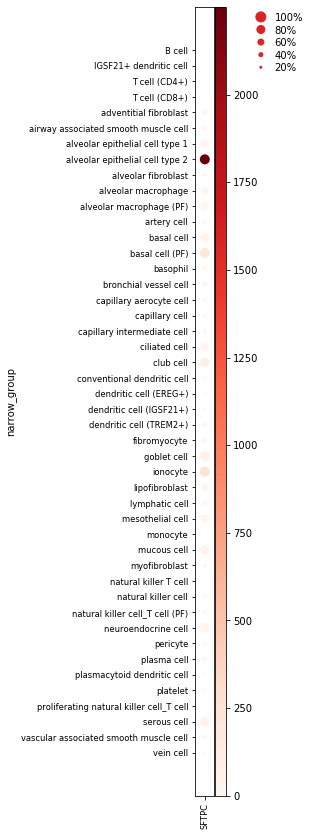

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[0.35, 0, 0.2, 0.5, 0.25])

In [103]:
scanpy.pl.dotplot(human_no_duplicate_barcodes_copy, var_names=['SFTPC'], groupby='narrow_group')

In [104]:
%%time

for outdir in outdirs:
    print(f'outdir: {outdir}')
    h5ad = os.path.join(outdir, "droplet_normal_lung_blood_P1-3__no_duplicate_barcodes__minimal_obs.h5ad")
    %time human_no_duplicate_barcodes_copy.write(h5ad)

outdir: /home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/human-lung-cell-atlas--from-kyle
CPU times: user 1.7 s, sys: 5.98 s, total: 7.68 s
Wall time: 17.2 s
outdir: /home/olga/googledrive/TabulaMicrocebus/data/human-lung-cell-atlas--from-kyle
CPU times: user 1.85 s, sys: 7.97 s, total: 9.82 s
Wall time: 4min 28s
CPU times: user 3.56 s, sys: 13.9 s, total: 17.5 s
Wall time: 4min 46s


In [105]:
human_no_duplicate_barcodes_copy.obs.individual.value_counts()

human_2_hlca2    26894
human_3_hlca3    25378
human_1_hlca1     9554
Name: individual, dtype: int64

In [106]:
human_no_duplicate_barcodes_copy

AnnData object with n_obs × n_vars = 61826 × 26485 
    obs: 'n_genes', 'n_counts', 'channel', 'free_annotation', 'cell_ontology_class', 'species', 'species_latin', 'sequencing_run', 'cell_barcode', 'individual', 'age', 'sex', 'narrow_group', 'broad_group', 'compartment_group', 'tissue'

In [107]:
def check_celltype_presence(adata, celltypes=('alveolar fibroblast', ), celltype_col='narrow_group'):
    for celltype in celltypes:
        assert celltype in set(adata.obs[celltype_col])

check_celltype_presence(human_no_duplicate_barcodes_copy)

In [117]:
1+1

2

# Subset to 1:1 orthologs

## Read orthologs

In [108]:
csv = os.path.join(
    "/home/olga/googledrive/TabulaMicrocebus/data/orthologous-genes",
    "ncbi_mgi_ensembl__mouse-lemur_human_mouse__orthologs__gene_names__one2one.csv",
)

gene_orthologies = pd.read_csv(csv, index_col=0)
print(gene_orthologies.shape)
gene_orthologies.head()

(15514, 3)


,mouse_lemur__gene_name,human__gene_name,mouse__gene_name
0,ADAT3,ADAT3,Adat3
1,CDK7,CDK7,Cdk7
2,CNMD,CNMD,Cnmd
3,TMEM229B,TMEM229B,Tmem229b
4,DIO2,DIO2,Dio2


## Subset to 1:1 orthologs

In [109]:
gene_mask = human_no_duplicate_barcodes_copy.var.index.isin(gene_orthologies['human__gene_name'].values)
print(gene_mask.sum())

# Need to copy so it's not an ArrayView object
human_no_duplicate_barcodes_copy_one2one = human_no_duplicate_barcodes_copy[:, gene_mask].copy()
human_no_duplicate_barcodes_copy_one2one

14854


AnnData object with n_obs × n_vars = 61826 × 14854 
    obs: 'n_genes', 'n_counts', 'channel', 'free_annotation', 'cell_ontology_class', 'species', 'species_latin', 'sequencing_run', 'cell_barcode', 'individual', 'age', 'sex', 'narrow_group', 'broad_group', 'compartment_group', 'tissue'

In [110]:
human_no_duplicate_barcodes_copy_one2one.var = gene_orthologies.set_index('human__gene_name').loc[human_no_duplicate_barcodes_copy_one2one.var.index]
human_no_duplicate_barcodes_copy_one2one.var.head()

,mouse_lemur__gene_name,mouse__gene_name
index,,
SAMD11,SAMD11,Samd11
NOC2L,NOC2L,Noc2l
KLHL17,KLHL17,Klhl17
PLEKHN1,PLEKHN1,Plekhn1
PERM1,PERM1,Perm1


### Check on "LOC" genes in mouse lemur

In [111]:
gene_orthologies.loc[gene_orthologies.mouse_lemur__gene_name.str.startswith("LOC")]

,mouse_lemur__gene_name,human__gene_name,mouse__gene_name
57,LOC105870932,SEC14L3,Sec14l3
106,LOC105856906,FASTKD2,Fastkd2
125,LOC105879033,NEUROD6,Neurod6
196,LOC105857556,FABP4,Fabp4
267,LOC105877166,PFAS,Pfas
...,...,...,...
15199,LOC105879404,TMBIM7P,Tmbim7
15201,LOC109730635,COX8A,Cox8a
15209,LOC105866607,CMA1,Cma1
15269,LOC105859236,OR4F6,Olfr1310


## Write human to file

In [122]:
outdir_gdrive = "/home/olga/googledrive/TabulaMicrocebus/data/cross-species"
outdir_local = "/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species"
outdirs = outdir_gdrive, outdir_local

In [123]:
for d in outdirs:

    h5ad = f"{d}/hlca_lung_blood_10x__human__one2one_orthologs__july2021.h5ad"
    human_no_duplicate_barcodes_copy_one2one.write(h5ad)

#     human_one2one.write_csvs(f'{d}/hlca_lung_blood__10x__human__one2one_orthologs__csvs/')


In [121]:
h5ad

'/home/olga/googledrive/TabulaMicrocebus/data/human-lung-cell-atlas--from-kyle/hlca_lung_blood_10x__human__one2one_orthologs__july2021.h5ad'

In [118]:
human_no_duplicate_barcodes_copy_one2one

AnnData object with n_obs × n_vars = 61826 × 14854 
    obs: 'n_genes', 'n_counts', 'channel', 'free_annotation', 'cell_ontology_class', 'species', 'species_latin', 'sequencing_run', 'cell_barcode', 'individual', 'age', 'sex', 'narrow_group', 'broad_group', 'compartment_group', 'tissue'
    var: 'mouse_lemur__gene_name', 'mouse__gene_name'

In [119]:
human_no_duplicate_barcodes_copy_one2one.obs.tissue.value_counts()

Lung     57353
Blood     4473
Name: tissue, dtype: int64

In [120]:
human_no_duplicate_barcodes_copy_one2one.obs.groupby(['tissue', 'individual']).size()

tissue  individual   
Blood   human_1_hlca1     2173
        human_3_hlca3     2300
Lung    human_1_hlca1     7381
        human_2_hlca2    26894
        human_3_hlca3    23078
dtype: int64